<a href="https://colab.research.google.com/github/tranquocdienspkt/AIspkt/blob/main/W4_25_2_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# pip install scikit-fuzzy

In [44]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

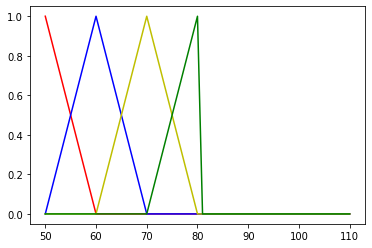

In [45]:
import matplotlib.pyplot as plt

x = np.arange(50,111,1)

slow = fuzz.trimf(x, [50,50,60])
medium = fuzz.trimf(x, [50,60,70])
medium_fast = fuzz.trimf(x,[60,70,80])
fullspeed = fuzz.trimf(x,[70,80,80])

plt.figure()

plt.plot(x,slow,'r',linewidth = 1.5, label = 'Slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'Medium')
plt.plot(x,medium_fast,'y',linewidth = 1.5, label = 'Medium_fast')
plt.plot(x,fullspeed,'g',linewidth = 1.5, label = 'fullspeed')

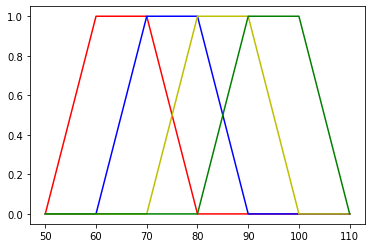

In [46]:
slow = fuzz.trapmf(x, [50,60,70,80])
medium = fuzz.trapmf(x, [60,70,80,90])
medium_fast = fuzz.trapmf(x,[70,80,90,100])
fullspeed = fuzz.trapmf(x,[80,90,100,110])

plt.figure()

plt.plot(x,slow,'r',linewidth = 1.5, label = 'Slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'Medium')
plt.plot(x,medium_fast,'y',linewidth = 1.5, label = 'Medium_fast')
plt.plot(x,fullspeed,'g',linewidth = 1.5, label = 'fullspeed')

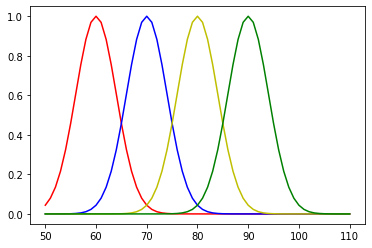

In [47]:
slow = fuzz.gaussmf(x,60,4)
medium = fuzz.gaussmf(x,70,4)
medium_fast = fuzz.gaussmf(x,80,4)
fullspeed = fuzz.gaussmf(x,90,4)

plt.figure()

plt.plot(x,slow,'r',linewidth = 1.5, label = 'Slow')
plt.plot(x,medium,'b',linewidth = 1.5, label = 'Medium')
plt.plot(x,medium_fast,'y',linewidth = 1.5, label = 'Medium_fast')
plt.plot(x,fullspeed,'g',linewidth = 1.5, label = 'fullspeed')

13.333333333333334


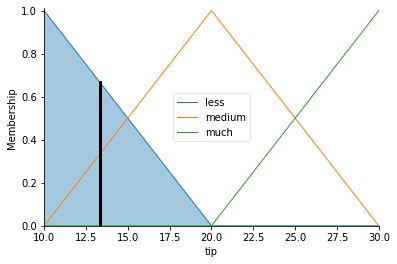

In [48]:
food = ctrl.Antecedent(np.arange(0,11,1), 'food')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(10,31,1), 'tip')

food['poor'] = fuzz.trimf(food.universe, [0,0,5])
food['average'] = fuzz.trimf(food.universe, [0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])
service['poor'] = fuzz.trimf(service.universe, [0,0,5])
service['average'] = fuzz.trimf(service.universe, [0,5,10])
service['good'] = fuzz.trimf(service.universe, [5,10,10])
tip['less'] = fuzz.trimf(tip.universe, [10,10,20])
tip['medium'] = fuzz.trimf(tip.universe, [10,20,30])
tip['much'] = fuzz.trimf(tip.universe, [20,30,30])

# food.view()
# service.view()
# tip.view()
# service['average'].view()

rule1 = ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'],tip['medium'])
rule4 = ctrl.Rule(food['average'] & service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'],tip['medium'])
rule6 = ctrl.Rule(food['average'] & service['good'],tip['much'])
rule7 = ctrl.Rule(food['good'] & service['poor'],tip['medium'])
rule8 = ctrl.Rule(food['good'] & service['average'],tip['medium'])
rule9 = ctrl.Rule(food['good'] & service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food'] = 0
tipping.input['service'] = 0
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

67.26247908909397


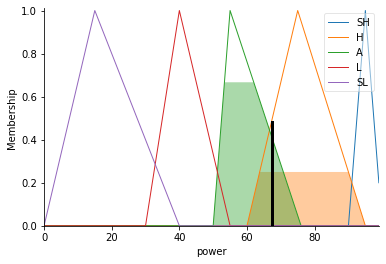

In [49]:
time = ctrl.Antecedent(np.arange(10,181,1), 'time')
rice = ctrl.Antecedent(np.arange(100,1500,1), 'rice')
power = ctrl.Consequent(np.arange(0,100,1), 'power')

time['VF'] = fuzz.trimf(time.universe, [10,10,20])
time['F'] = fuzz.trimf(time.universe, [20,25,45])
time['M'] = fuzz.trimf(time.universe, [30,45,90])
time['L'] = fuzz.trimf(time.universe, [60,90,150])
time['SL'] = fuzz.trimf(time.universe, [120,150,185])

rice['SM'] = fuzz.trimf(rice.universe, [1000,1250,1500])
rice['M'] = fuzz.trimf(rice.universe, [800,900,1250])
rice['A'] = fuzz.trimf(rice.universe, [500,650,900])
rice['L'] = fuzz.trimf(rice.universe, [300,400,650])
rice['SL'] = fuzz.trimf(rice.universe, [100,200,400])

power['SH'] = fuzz.trimf(power.universe, [90,95,100])
power['H'] = fuzz.trimf(power.universe, [60,75,95])
power['A'] = fuzz.trimf(power.universe, [50,55,76])
power['L'] = fuzz.trimf(power.universe, [30,40,55])
power['SL'] = fuzz.trimf(power.universe, [0,15,40])
# time.view()
# rice.view()
# power.view()

rule1 = ctrl.Rule(time['VF'] & rice['SM'],power['SH'])
rule2 = ctrl.Rule(time['VF'] & rice['M'],power['SH'])
rule3 = ctrl.Rule(time['VF'] & rice['A'],power['H'])
rule4 = ctrl.Rule(time['VF'] & rice['L'],power['A'])
rule5 = ctrl.Rule(time['VF'] & rice['SL'],power['A'])
rule6 = ctrl.Rule(time['F'] & rice['SM'],power['SH'])
rule7 = ctrl.Rule(time['F'] & rice['M'],power['SH'])
rule8 = ctrl.Rule(time['F'] & rice['A'],power['H'])
rule9 = ctrl.Rule(time['F'] & rice['L'],power['H'])
rule10 = ctrl.Rule(time['F'] & rice['SL'],power['A'])

rule11 = ctrl.Rule(time['M'] & rice['SM'],power['SH'])
rule12 = ctrl.Rule(time['M'] & rice['M'],power['SH'])
rule13 = ctrl.Rule(time['M'] & rice['A'],power['H'])
rule14 = ctrl.Rule(time['M'] & rice['L'],power['A'])
rule15 = ctrl.Rule(time['M'] & rice['SL'],power['L'])

rule16 = ctrl.Rule(time['L'] & rice['SM'],power['H'])
rule17 = ctrl.Rule(time['L'] & rice['M'],power['H'])
rule18 = ctrl.Rule(time['L'] & rice['A'],power['A'])
rule19 = ctrl.Rule(time['L'] & rice['L'],power['A'])
rule20 = ctrl.Rule(time['L'] & rice['SL'],power['L'])

rule21 = ctrl.Rule(time['SL'] & rice['SM'],power['A'])
rule22 = ctrl.Rule(time['SL'] & rice['M'],power['A'])
rule23 = ctrl.Rule(time['SL'] & rice['A'],power['A'])
rule24 = ctrl.Rule(time['SL'] & rice['L'],power['L'])
rule25 = ctrl.Rule(time['SL'] & rice['SL'],power['SL'])

powerc_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,
                                 rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,
                                 rule21,rule22,rule23,rule24,rule25])
powerc = ctrl.ControlSystemSimulation(powerc_ctrl)

powerc.input['time'] = 40
powerc.input['rice'] = 400

powerc.compute()

print(powerc.output['power'])
power.view(sim = powerc)